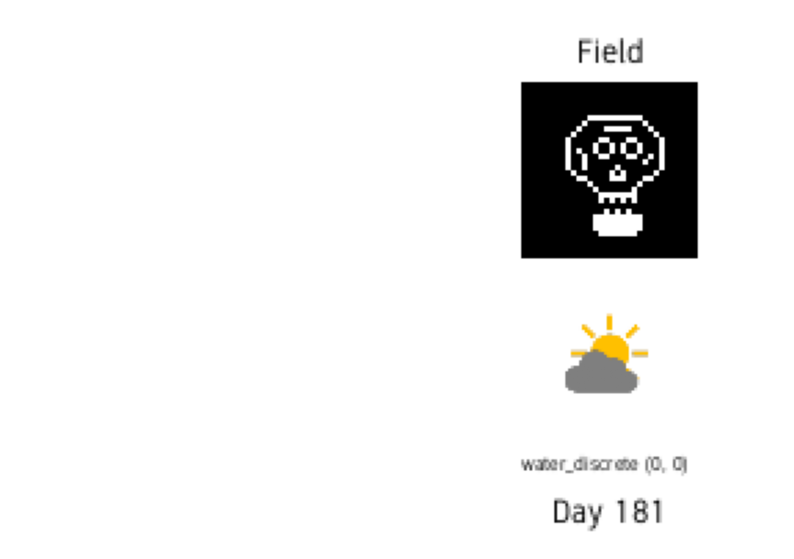

Current reward is  4.0
-] Do nothing (empty).
0] Farmer BasicFarmer-0 performs intervention water_discrete with parameters {'plot': (0, 0), 'amount#L': 1.0, 'duration#min': 60} on Soil-0 in Field-0.
1] Farmer BasicFarmer-0 performs intervention water_discrete with parameters {'plot': (0, 0), 'amount#L': 2.0, 'duration#min': 60} on Soil-0 in Field-0.
2] Farmer BasicFarmer-0 performs intervention water_discrete with parameters {'plot': (0, 0), 'amount#L': 3.0, 'duration#min': 60} on Soil-0 in Field-0.
3] Farmer BasicFarmer-0 performs intervention water_discrete with parameters {'plot': (0, 0), 'amount#L': 4.0, 'duration#min': 60} on Soil-0 in Field-0.
4] Farmer BasicFarmer-0 performs intervention water_discrete with parameters {'plot': (0, 0), 'amount#L': 5.0, 'duration#min': 60} on Soil-0 in Field-0.
5] Farmer BasicFarmer-0 performs intervention harvest on Plant-0 in Field-0.

 


In [ ]:
#@title Interactive game (execute to play).
%load_ext autoreload
%autoreload 2

from rlberry.agents import AgentWithSimplePolicy
from rlberry.manager import AgentManager, evaluate_agents, plot_writer_data
from rlberry.envs import gym_make
from farmgym_games.game_builder.utils import farmgymobs_to_obs, get_desc_from_value
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

from farmgym_games.game_catalogue.game0_env import Farm0

from rlberry.utils.logging import set_level
set_level("WARNING")
import gym
import time


class InteractiveAgent(AgentWithSimplePolicy):
    name = "InteractiveAgent"

    def __init__(self, env, **kwargs):
        AgentWithSimplePolicy.__init__(self, env, **kwargs)
        self.action_str = " "
        self.iteration = 0

    def fit(self, budget=3e5, **kwargs):

        observation = self.env.reset()
        farmgym_obs = [" " for i in range(len(observation))]
        self.episode_reward = 0
        self.rewards = []
        for ep in range(int(budget)):
             
            if ep > 80:
              clear_output()
              image = self.env.render()
              fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,7))
              ax1.axis("off")
              ax2.axis("off")
              image = np.array(image, dtype=np.float32) / 255.0
              ax2.imshow(image)
              text = []

              #for obv in observation:
                #print(observation)
              ax1.text(0,0.5, "\n".join(text), va='center', size=20)

              plt.show() 
              time.sleep(0.5)
              action = self.policy(observation)
              observation, reward, done, _, info = self.env.step(action)

              self.episode_reward += reward

            else:
              action = [0]
              observation, reward, done, _, info = self.env.step(action)

              self.episode_reward += reward
            if done:
                self.writer.add_scalar("episode_rewards", self.episode_reward, ep)
                self.rewards.append(self.episode_reward)
                self.episode_reward = 0
                self.env.reset()

    def policy(self, observation):
      print('Current reward is ', self.episode_reward)
      print(self.env.farm.actions_to_string())
      print(' ') # blank line
      action = input(f"Which action (int in [0, {self.env.farm.action_space.space.n-1}]) or leave empty for 'Do nothing'? ")
      if action in ["", " "]:
          return [] 
      return [int(action)] 

env = Farm0()
agent = InteractiveAgent(env)
agent.fit(100)
